# Tips and Tricks - a collection of potentially useful snippets

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
%matplotlib inline

In [23]:
df = pd.read_pickle('power_consumption')
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.435242,0.122133,240.688713,6.070014,1.179133,1.779906,6.759660
std,1.312705,0.114693,3.177086,5.546649,6.311980,7.258230,8.522363
min,0.198000,0.000000,223.490000,0.800000,0.000000,0.000000,0.000000
25%,0.324000,0.000000,238.687500,1.400000,0.000000,0.000000,0.000000
50%,1.294000,0.110000,240.960000,5.400000,0.000000,0.000000,0.000000
75%,2.212000,0.190000,242.920000,9.400000,0.000000,1.000000,17.000000
max,10.670000,0.874000,250.890000,46.400000,75.000000,78.000000,20.000000


In [24]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
20000,30/12/2006,14:44:00,2.014,0.402,240.33,8.6,0,1,18,2006-12-30 14:44:00
20001,30/12/2006,14:45:00,2.170,0.512,240.96,9.2,0,0,18,2006-12-30 14:45:00
20002,30/12/2006,14:46:00,2.194,0.520,241.18,9.2,0,0,17,2006-12-30 14:46:00
20003,30/12/2006,14:47:00,2.172,0.514,240.98,9.2,0,0,18,2006-12-30 14:47:00
20004,30/12/2006,14:48:00,2.188,0.518,241.02,9.2,0,0,18,2006-12-30 14:48:00


## Convert to time series (use datetime as index)

In [25]:
df.index = df['Datetime']

In [26]:
# It's nice seeing day of the week as a word - so I'll add that as a column
import calendar
df['Day_name'] = [calendar.day_name[x] for x in df.Datetime.dt.dayofweek]

We can now look at time ranges, resample and do other nifty tricks

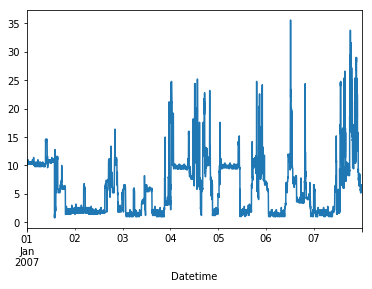

In [27]:
week = df['2007-01-01':'2007-01-07'] # 1 week of readings
week['Global_intensity'].plot()

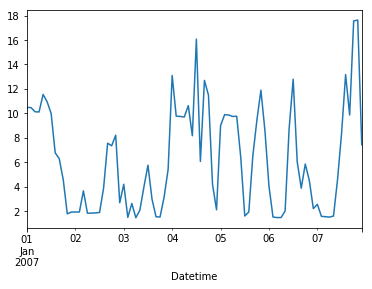

In [28]:
week.resample('2H')['Global_intensity'].plot() # resampled to one value every 2 hours

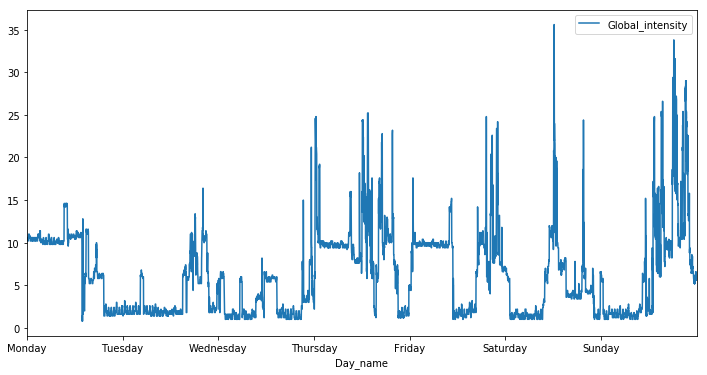

In [29]:
# A more complex plot, with weekdays shown on the graph
week.plot(x='Day_name', y='Global_intensity', figsize=(12, 6), 
                xticks = range(0,  len(week.index), len(week.index)/7)) # Little bit hacky, but gets us all the days

Selecting based on certain conditions

In [30]:
week.loc[week.Day_name == 'Thursday'].head(1) #(week.Day_name is equivalent to week['Day_name'])

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_name
Datetime,,,,,,,,,,,
2007-01-04,4/1/2007,00:00:00,0.85,0.046,242.61,3.6,0,0,0,2007-01-04,Thursday


Chaining those conditions:

In [31]:
week.loc[(week.Day_name == 'Thursday') & (week.Global_active_power > 2.0)].head(1) 

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_name
Datetime,,,,,,,,,,,
2007-01-04 00:15:00,4/1/2007,00:15:00,2.172,0.084,241.47,9.8,0,6,0,2007-01-04 00:15:00,Thursday


# Fancy plotting

Two graphs on the same axis:

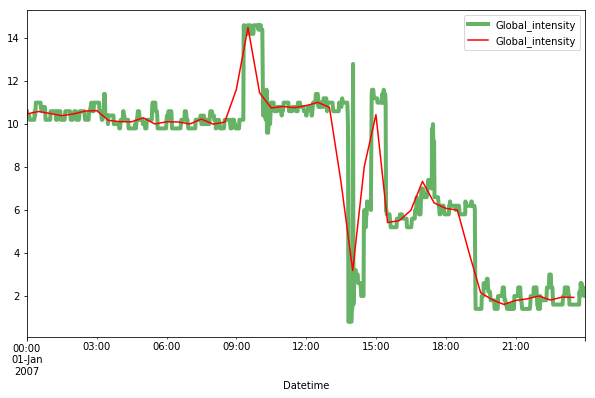

In [32]:
day_axis = df['2007-1-1'].plot(y = 'Global_intensity', figsize = (10, 6), style='g', linewidth=4, alpha=0.6)
df['2007-1-1'].resample('30MIN').plot( y = 'Global_intensity', ax=day_axis, color='r')

Using matplotlib directly - plt.plot(x, y, args...)

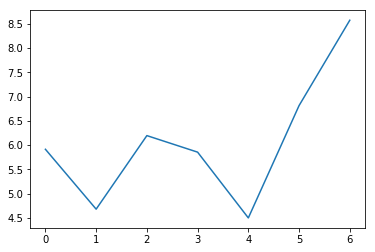

In [36]:
means = []
days = calendar.day_name
for day in days:
    means.append(df.loc[df['Day_name'] == day].mean()['Global_intensity'])
plt.plot(means)

# Selecting subsets of the data

We've seen selecting a date or date range:

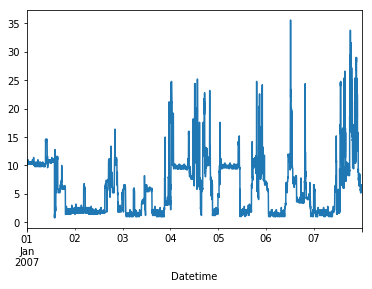

In [37]:
df['2007-01-01':'2007-01-07']['Global_intensity'].plot()

Selecting all readings at 10am:

In [39]:
df.loc[df.Time == '10:00:00']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_name
Datetime,,,,,,,,,,,
2006-12-31 10:00:00,31/12/2006,10:00:00,2.856,0.130,238.78,12.0,0,2,0,2006-12-31 10:00:00,Sunday
2007-01-01 10:00:00,1/1/2007,10:00:00,3.480,0.048,239.62,14.4,0,0,18,2007-01-01 10:00:00,Monday
2007-01-02 10:00:00,2/1/2007,10:00:00,0.358,0.000,238.27,1.4,0,0,0,2007-01-02 10:00:00,Tuesday
2007-01-03 10:00:00,3/1/2007,10:00:00,0.892,0.200,240.48,4.0,0,0,0,2007-01-03 10:00:00,Wednesday
2007-01-04 10:00:00,4/1/2007,10:00:00,2.096,0.000,237.27,8.8,0,0,17,2007-01-04 10:00:00,Thursday
2007-01-05 10:00:00,5/1/2007,10:00:00,3.352,0.120,236.15,14.2,0,0,17,2007-01-05 10:00:00,Friday
2007-01-06 10:00:00,6/1/2007,10:00:00,1.362,0.130,236.99,5.8,0,2,0,2007-01-06 10:00:00,Saturday
2007-01-07 10:00:00,7/1/2007,10:00:00,0.384,0.064,244.08,1.8,0,0,0,2007-01-07 10:00:00,Sunday
2007-01-08 10:00:00,8/1/2007,10:00:00,1.260,0.000,238.05,5.2,0,0,18,2007-01-08 10:00:00,Monday


Building a smaller dataframe for some analysis, selecting a subsample of the data. For eg, looking at only times when there is activity in the kitchen, and only interested in global_active_power and voltage:

In [41]:
kitch = df.loc[df['Sub_metering_1'] > 0][['Global_active_power', 'Voltage']]
kitch.head()

,Global_active_power,Voltage
Datetime,,
2006-12-30 18:50:00,4.368,233.01
2006-12-30 18:51:00,5.504,231.18
2006-12-30 18:52:00,5.472,230.72
2006-12-30 18:53:00,5.448,230.19
2006-12-30 18:54:00,5.498,229.26


In [42]:
kitch.describe()

,Global_active_power,Voltage
count,7831.000000,7831.000000
mean,3.185486,237.951882
std,1.623357,3.535747
min,0.226000,223.490000
25%,1.775000,235.760000
50%,3.046000,238.070000
75%,4.143000,240.310000
max,10.670000,247.870000


# Adding new columns

Let's say we want a column showing power use in the house outside the sub-metered areas. From the notes on the data, we're given "Notes: 1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3."

This takes a little while to run.

In [45]:
df['energy_per_min'] = df['Global_active_power']*1000/60 - df['Sub_metering_1']- df['Sub_metering_2']- df['Sub_metering_3']

In [46]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_name,energy_per_min
Datetime,,,,,,,,,,,,
2006-12-30 14:44:00,30/12/2006,14:44:00,2.014,0.402,240.33,8.6,0,1,18,2006-12-30 14:44:00,Saturday,14.566667
2006-12-30 14:45:00,30/12/2006,14:45:00,2.170,0.512,240.96,9.2,0,0,18,2006-12-30 14:45:00,Saturday,18.166667
2006-12-30 14:46:00,30/12/2006,14:46:00,2.194,0.520,241.18,9.2,0,0,17,2006-12-30 14:46:00,Saturday,19.566667
2006-12-30 14:47:00,30/12/2006,14:47:00,2.172,0.514,240.98,9.2,0,0,18,2006-12-30 14:47:00,Saturday,18.200000
2006-12-30 14:48:00,30/12/2006,14:48:00,2.188,0.518,241.02,9.2,0,0,18,2006-12-30 14:48:00,Saturday,18.466667
